In [1]:
# Librerias
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Nos conectamos a Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargamos CSV
df = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")
df.head()

<ipython-input-3-6aa2531cc7a5>:2: DtypeWarning: Columns (21,25,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")


,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_from,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False


In [4]:
# Nombre real de la 1era variable
#df.rename(columns={'to_char': 'date_day'}, inplace=True)

In [5]:
# Convertimos (null) en NaN
df.replace("(null)", np.nan,inplace=True)

In [6]:
# Información del Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606923 entries, 0 to 4606922
Data columns (total 36 columns):
 #   Column                                Dtype 
---  ------                                ----- 
 0   date_day                              object
 1   unique_venue_id                       int64 
 2   created                               object
 3   venue_status                          object
 4   venue_active_from                     object
 5   original_marketplace_venue_type_name  object
 6   country_code                          object
 7   tier                                  object
 8   saas_product                          object
 9   first_live_date                       object
 10  latest_live_date                      object
 11  disabled_date                         object
 12  reactivated_status                    object
 13  is_twconnect_migrated                 bool  
 14  is_purchasable                        object
 15  is_widget_enabled               

In [7]:
# Porcentaje de Nulos de la columna
df.isna().mean()*100

date_day                                 0.000000
unique_venue_id                          0.000000
created                                  0.000000
venue_status                            19.732563
venue_active_from                       92.750519
original_marketplace_venue_type_name     4.861466
country_code                             0.000000
tier                                    49.194441
saas_product                             0.000000
first_live_date                         22.631353
latest_live_date                        23.053565
disabled_date                           73.586947
reactivated_status                       0.000000
is_twconnect_migrated                    0.000000
is_purchasable                          19.732563
is_widget_enabled                       19.732563
is_heavy_saas                           22.859119
first_heavy_saas_date                   98.699370
active_employees                        84.212999
direct_appointments_l30d                22.859119


In [8]:
df_test = df.loc[df.unique_venue_id== 12000000439].sort_values(by=['date_day'],ascending=False).head(5)
df_test[["date_day", "unique_venue_id","saas_product","is_tw_mp_listed","is_twconnect_migrated"]]

,date_day,unique_venue_id,saas_product,is_tw_mp_listed,is_twconnect_migrated
2036420,2023-06-01,12000000439,tw_pro,true,True
2036396,2023-06-01,12000000439,tw_pro,true,True
2036419,2023-05-01,12000000439,tw_pro,true,True
2036395,2023-05-01,12000000439,tw_pro,true,True
2036394,2023-04-01,12000000439,tw_pro,true,True


**Creación Variable Churn**

In [9]:
#Transformamos la variable a formato fecha
df['disabled_date'] = pd.to_datetime(df['disabled_date'])
df['first_live_date'] = pd.to_datetime(df['first_live_date'])
df['latest_live_date'] = pd.to_datetime(df['latest_live_date'])

In [10]:
# Eliminar todos los registros que tienen valores NaN en latest_live_date, ya que parece ser un error en los datos
df.dropna(subset=['latest_live_date'], inplace=True)

In [11]:
# Si Disabled_Date > Latest_Live_Date por 2 meses, consideramos churn es 1, si no, churn es 0
dos_meses = df['latest_live_date'] + pd.DateOffset(months=2)
df['churn'] = np.where(df['disabled_date'] > dos_meses, 1, 0)

In [12]:
df.churn.value_counts(normalize=True) * 100

0    70.833287
1    29.166713
Name: churn, dtype: float64

In [13]:
df.loc[df.unique_venue_id== 11000373610].sort_values(by=['date_day'],ascending=False).head(5)

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan,churn
1556779,2023-06-01,11000373610,2017-10-17 10:35:37,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,...,2999-12-31 00:00:00,0,NaN,0,NaN,1,Entry,29.0,False,1
1556778,2023-05-01,11000373610,2017-10-17 10:35:37,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,...,2999-12-31 00:00:00,0,NaN,0,NaN,1,Entry,29.0,False,1
1556777,2023-04-01,11000373610,2017-10-17 10:35:37,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,...,2999-12-31 00:00:00,0,NaN,0,NaN,1,Entry,29.0,False,1
1556776,2023-03-01,11000373610,2017-10-17 10:35:37,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,...,2999-12-31 00:00:00,0,NaN,0,NaN,1,Entry,29.0,False,1
1556775,2023-02-01,11000373610,2017-10-17 10:35:37,ARCHIVED,NaN,Beauty Salon,BE,Tier 2,tw_connect,2017-10-26,...,2999-12-31 00:00:00,0,NaN,0,NaN,1,Entry,29.0,False,1


In [14]:
df.loc[df.unique_venue_id== 13026416403].sort_values(by=['date_day'],ascending=False).head(5)

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan,churn
3340302,2023-06-01,13026416403,2017-03-02 09:18:24,DISABLED,NaN,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0
4349625,2023-05-01,13026416403,2017-03-02 09:18:24,DISABLED,NaN,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4466047,2023-04-01,13026416403,2017-03-02 09:18:24,DISABLED,NaN,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
4274751,2023-03-01,13026416403,2017-03-02 09:18:24,DISABLED,NaN,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1
2794547,2023-02-01,13026416403,2017-03-02 09:18:24,DISABLED,NaN,Beauty Salon,NL,Tier 1,tw_connect,2017-03-13,...,NaN,0,NaN,0,NaN,NaN,NaN,NaN,NaN,1


# Variables Bruno

Variables:
* first_live_date: First Live Date of the Venue
* latest_live_date: Latest Live Date of the Venue. If first_live_date=latest_live_date Venue never Churn and came back.
* disabled_date: Date when the Venue was disabled
* reactivated_status: If the Venue was reactivated or not.
* is_twconnect_migrated: If the SaaS Venue product was migrated to TW or not.
* is_purchasable: The number of venues that are available on the TW Marketplace and have at least 1 service that can be bought.
* is_widget_enabled: If widget is enabled or not.
* is_heavy_saas: If the venue is heavy saas or not.

In [15]:
# Subset con las variables a analizar
df_bruno = df[["date_day","unique_venue_id","first_live_date", "latest_live_date","disabled_date","reactivated_status","is_twconnect_migrated","is_purchasable","is_widget_enabled","is_heavy_saas","churn",'prepay','plan_name']]
df_bruno.head()

,date_day,unique_venue_id,first_live_date,latest_live_date,disabled_date,reactivated_status,is_twconnect_migrated,is_purchasable,is_widget_enabled,is_heavy_saas,churn,prepay,plan_name
0,2021-07-01,11000000016,2009-07-20,2009-07-20,NaT,none,False,false,false,NaN,0,0,Entry
1,2021-08-01,11000000016,2009-07-20,2009-07-20,NaT,none,False,false,false,NaN,0,0,Entry
2,2021-09-01,11000000016,2009-07-20,2009-07-20,NaT,none,False,false,false,NaN,0,0,Entry
3,2021-10-01,11000000016,2009-07-20,2009-07-20,NaT,none,False,false,false,NaN,0,0,Entry
4,2021-11-01,11000000016,2009-07-20,2009-07-20,NaT,none,False,false,false,NaN,0,0,Entry


**first_live_date**

<ipython-input-16-3364f8fdcc70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bruno['first_live_month_year'] = df_bruno['first_live_date'].dt.to_period('M')


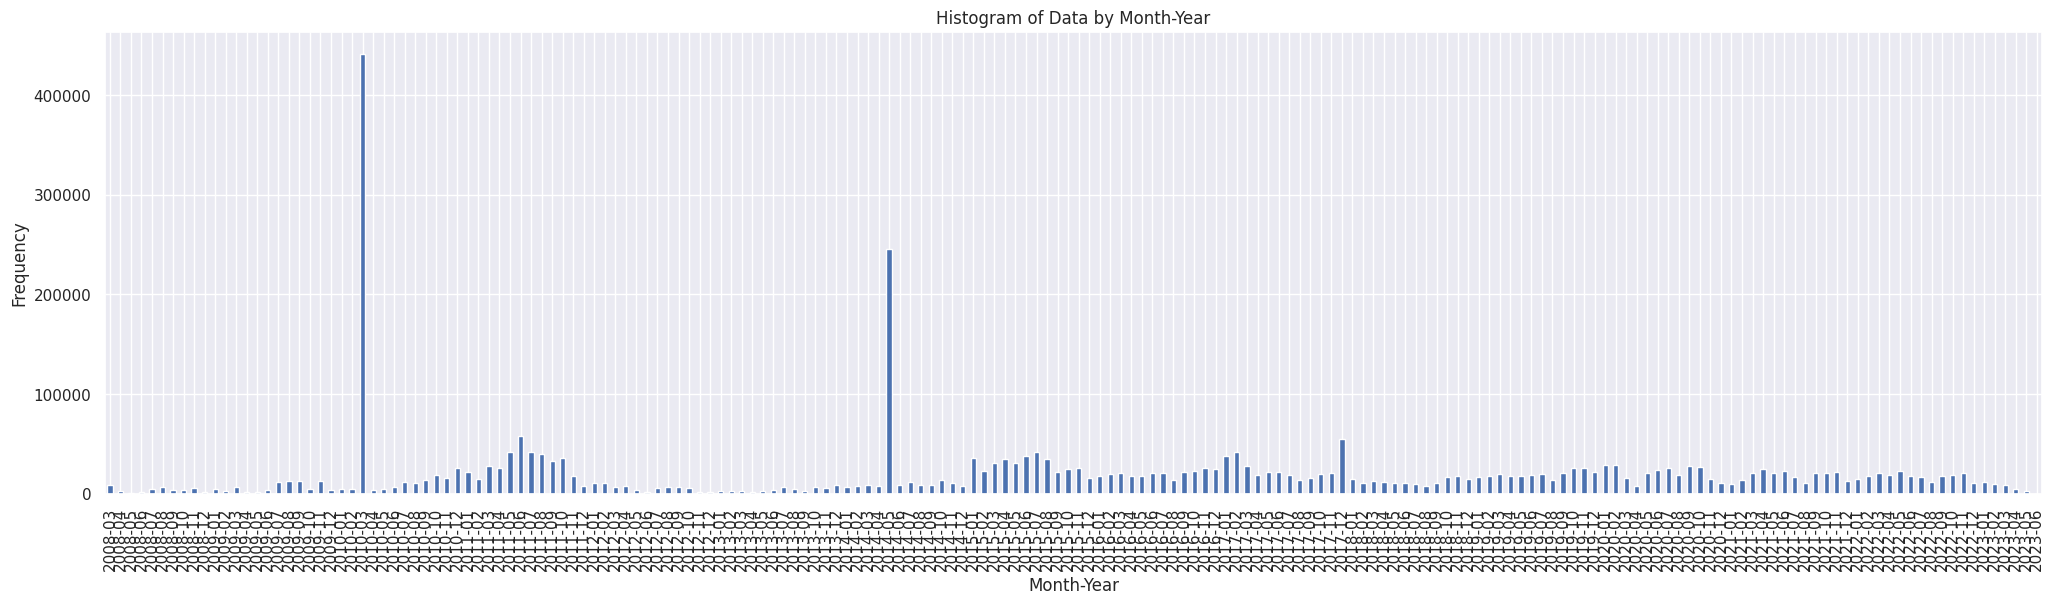

In [16]:
df_bruno['first_live_month_year'] = df_bruno['first_live_date'].dt.to_period('M')
plt.figure(figsize=(25, 6))
df_bruno['first_live_month_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Histogram of Data by Month-Year')
plt.show()

La variable por si solo no nos entrega información relevante para el modelo. Sin embargo, a partir de esta variable y latest_live_date y disabled_date podemos calcular el tiempo de existencia de la Venue.

**latest_live_date**

<ipython-input-17-8a21fb987bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bruno['latest_live_month_year'] = df_bruno['latest_live_date'].dt.to_period('M')


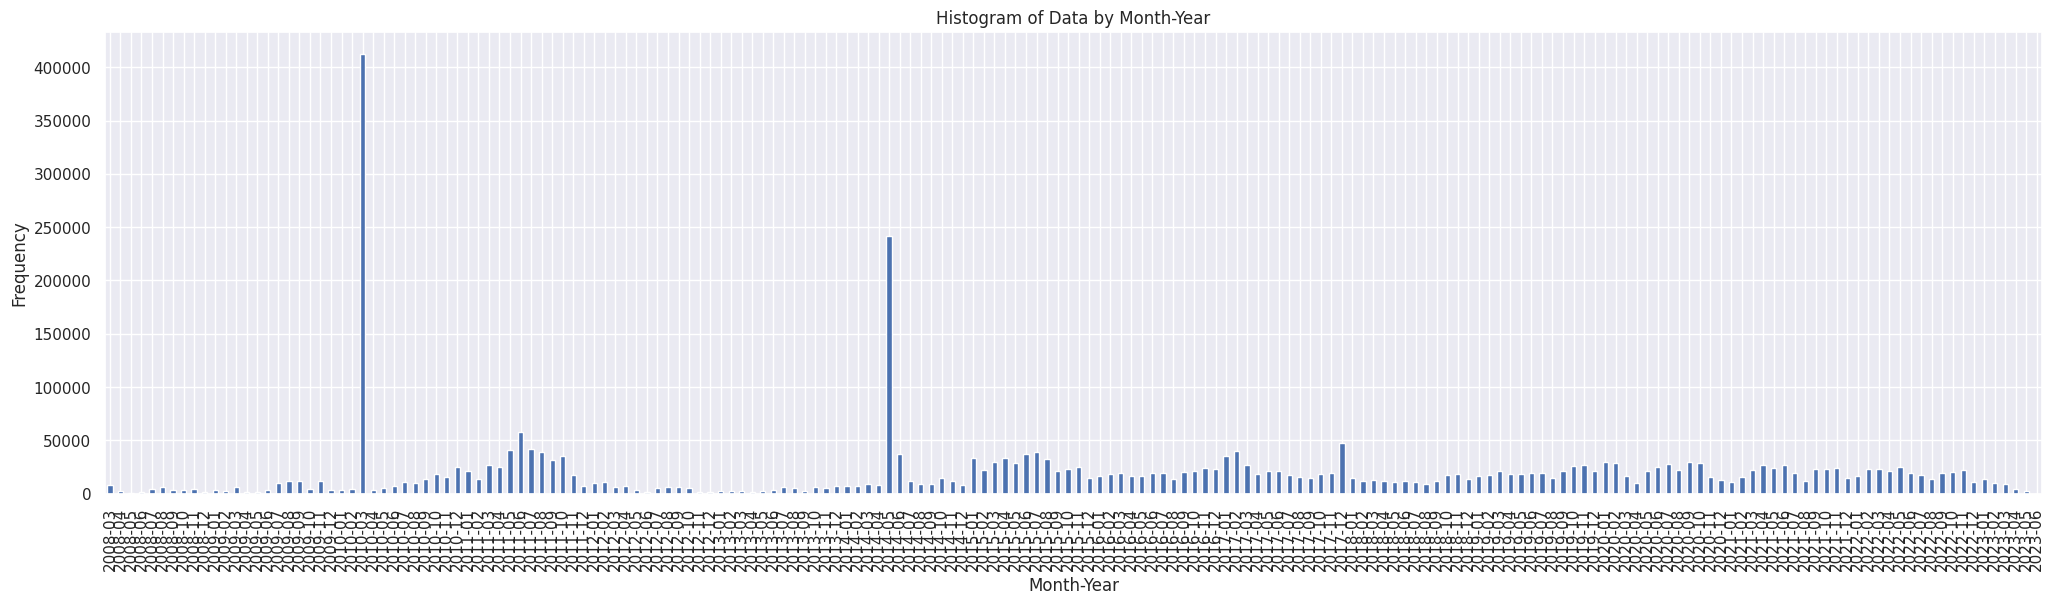

In [17]:
df_bruno['latest_live_month_year'] = df_bruno['latest_live_date'].dt.to_period('M')
plt.figure(figsize=(25, 6))
df_bruno['latest_live_month_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Histogram of Data by Month-Year')
plt.show()

In [18]:
df['first_live_date'].eq(df['latest_live_date']).value_counts(normalize=True) * 100

True     89.870554
False    10.129446
dtype: float64

Tenemos que un 11.4% de las Venues ha sido Desabilitada y vuelto a trabajar con TW.

La variable por si solo no nos entrega información relevante para el modelo. Sin embargo, a partir de esta variable y first_live_date y disabled_date podemos calcular el tiempo de existencia de la Venue.

**disabled_date**

<ipython-input-19-693d4213b167>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bruno['disabled_date_month_year'] = df_bruno['disabled_date'].dt.to_period('M')


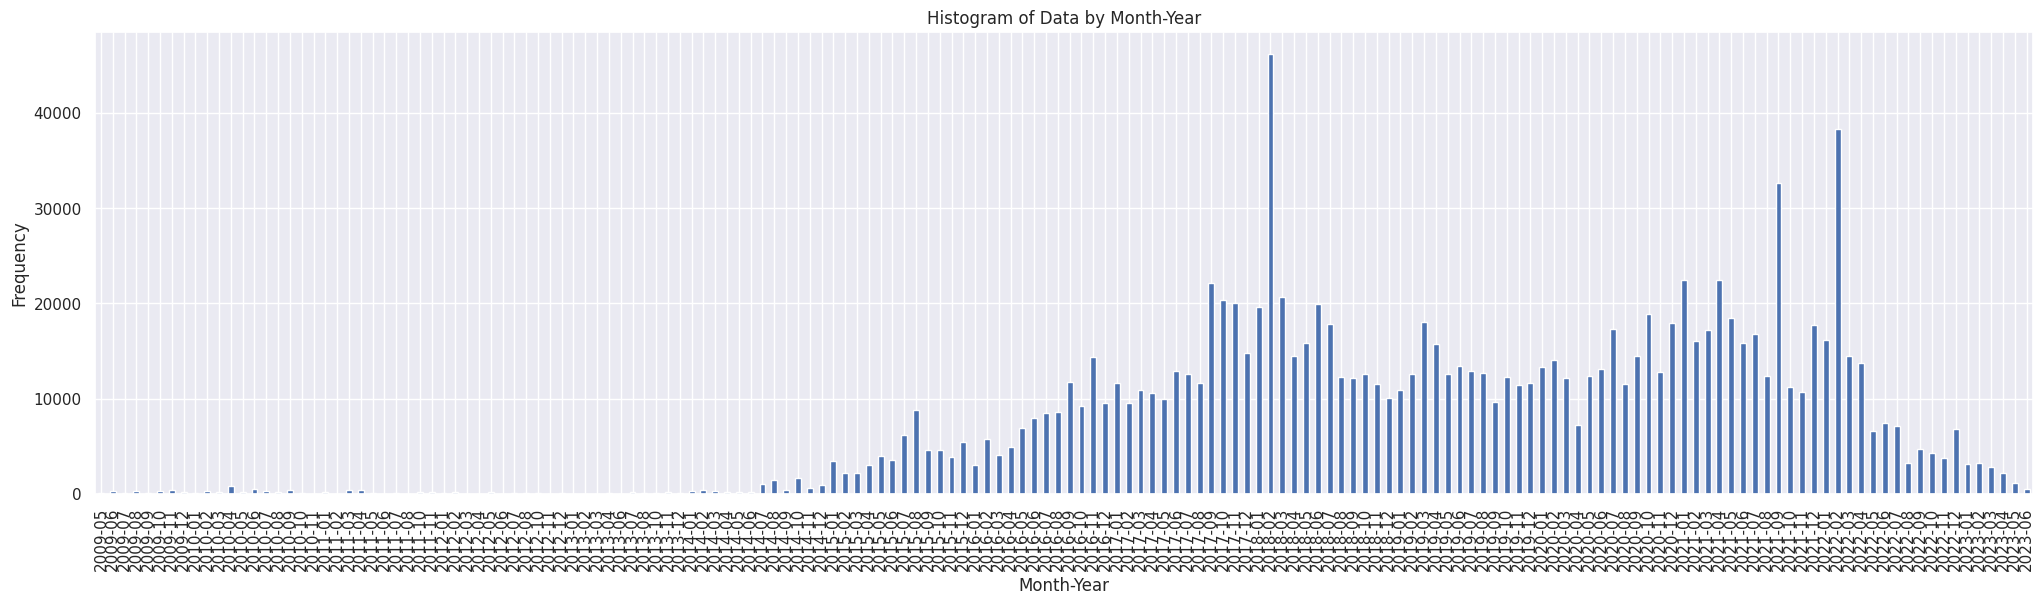

In [19]:
df_bruno['disabled_date_month_year'] = df_bruno['disabled_date'].dt.to_period('M')
plt.figure(figsize=(25, 6))
df_bruno['disabled_date_month_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Histogram of Data by Month-Year')
plt.show()

Variable usada para el cálculo del flag de Churn.

**reactivated_status**

In [20]:
df_bruno.reactivated_status.value_counts(normalize=True) * 100

none               98.604149
reactivated         0.842684
reactivated new     0.553167
Name: reactivated_status, dtype: float64

<Axes: xlabel='reactivated_status', ylabel='Count'>

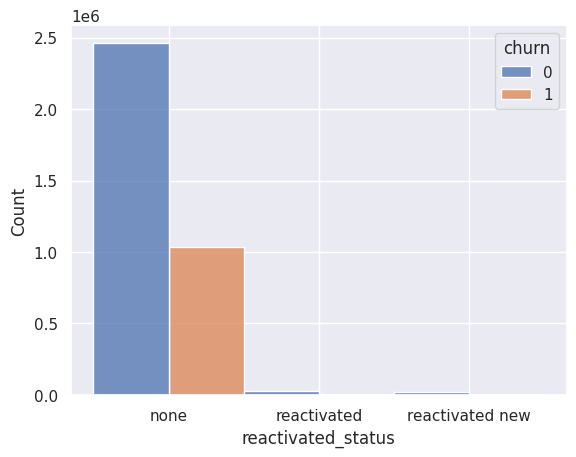

In [21]:
sns.histplot(data=df_bruno, x="reactivated_status", hue="churn", multiple="dodge")

Variable no relevante.

case when first_live_date is not null
and first_live_date <> latest_live_date
and is_live = true
and datediff(month, disabled_date, latest_live_date) < 6
then 'reactivated'
when first_live_date is not null
and first_live_date <> latest_live_date
and is_live = true
and datediff(month, disabled_date, latest_live_date) >= 6
then 'reactivated new'
else 'none'
end as reactivated_status

**is_twconnect_migrated**



In [22]:
df_bruno.is_twconnect_migrated.value_counts(normalize=True) * 100

False    99.465113
True      0.534887
Name: is_twconnect_migrated, dtype: float64

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<Axes: xlabel='is_twconnect_migrated', ylabel='Count'>

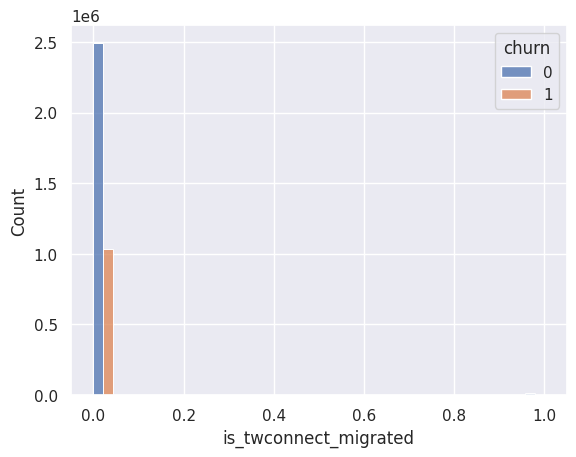

In [23]:
sns.histplot(data=df_bruno, x="is_twconnect_migrated", hue="churn", multiple="dodge")

Variable no relevante.

**is_purchasable**

In [24]:
df_bruno.is_purchasable.value_counts(normalize=True) * 100

false    83.006967
true     16.993033
Name: is_purchasable, dtype: float64

<Axes: xlabel='is_purchasable', ylabel='Count'>

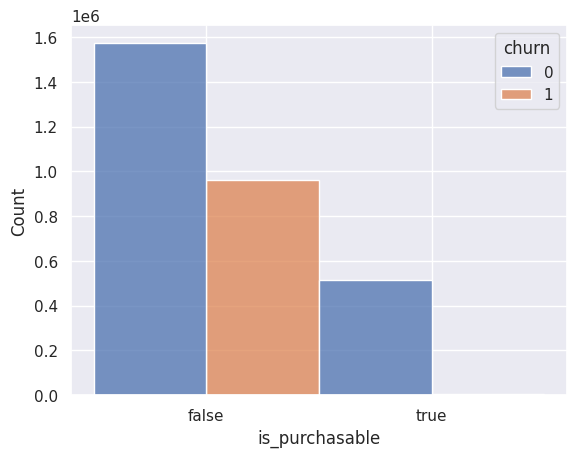

In [25]:
sns.histplot(data=df_bruno, x="is_purchasable", hue="churn", multiple="dodge")

In [26]:
# Calculate the Phi coefficient using the pandas.crosstab function
observed = pd.crosstab(df_bruno['is_purchasable'], df_bruno['churn'])
phi = observed.apply(lambda r: r / len(df_bruno))
phi_coefficient = np.sqrt(phi.values[1][1] * phi.values[0][0] / (phi.values[1][0] * phi.values[0][1]))

# Display the Phi coefficient
print("Phi coefficient:", phi_coefficient)

Phi coefficient: 0.09655966427140564


In [27]:
df.groupby('churn')['is_purchasable'].value_counts(normalize=True) * 100

churn  is_purchasable
0      false             75.322944
       true              24.677056
1      false             99.695468
       true               0.304532
Name: is_purchasable, dtype: float64

**is_widget_enabled**

In [28]:
df_bruno.is_widget_enabled.value_counts(normalize=True) * 100

false    81.508474
true     18.491526
Name: is_widget_enabled, dtype: float64

In [29]:
df.groupby('churn')['is_widget_enabled'].value_counts(normalize=True) * 100

churn  is_widget_enabled
0      false                73.275807
       true                 26.724193
1      false                99.388545
       true                  0.611455
Name: is_widget_enabled, dtype: float64

<Axes: xlabel='is_widget_enabled', ylabel='Count'>

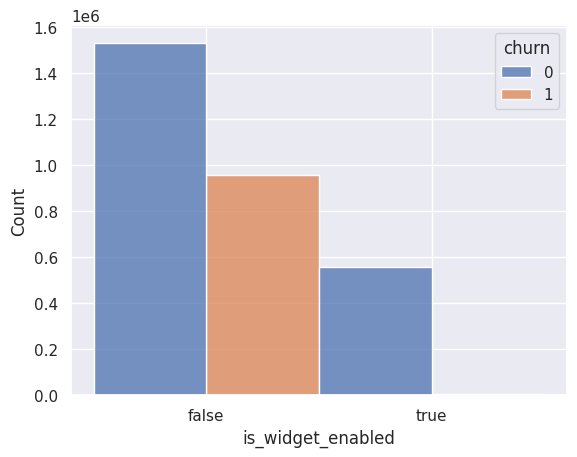

In [30]:
sns.histplot(data=df_bruno, x="is_widget_enabled", hue="churn", multiple="dodge")

**is_heavy_saas**

In [31]:
df_bruno.is_heavy_saas.value_counts(normalize=True) * 100

false    85.610757
true     14.389243
Name: is_heavy_saas, dtype: float64

<ipython-input-32-b29fce62532a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bruno['latest_live_date_month_year'] = df_bruno['latest_live_date'].dt.to_period('M')


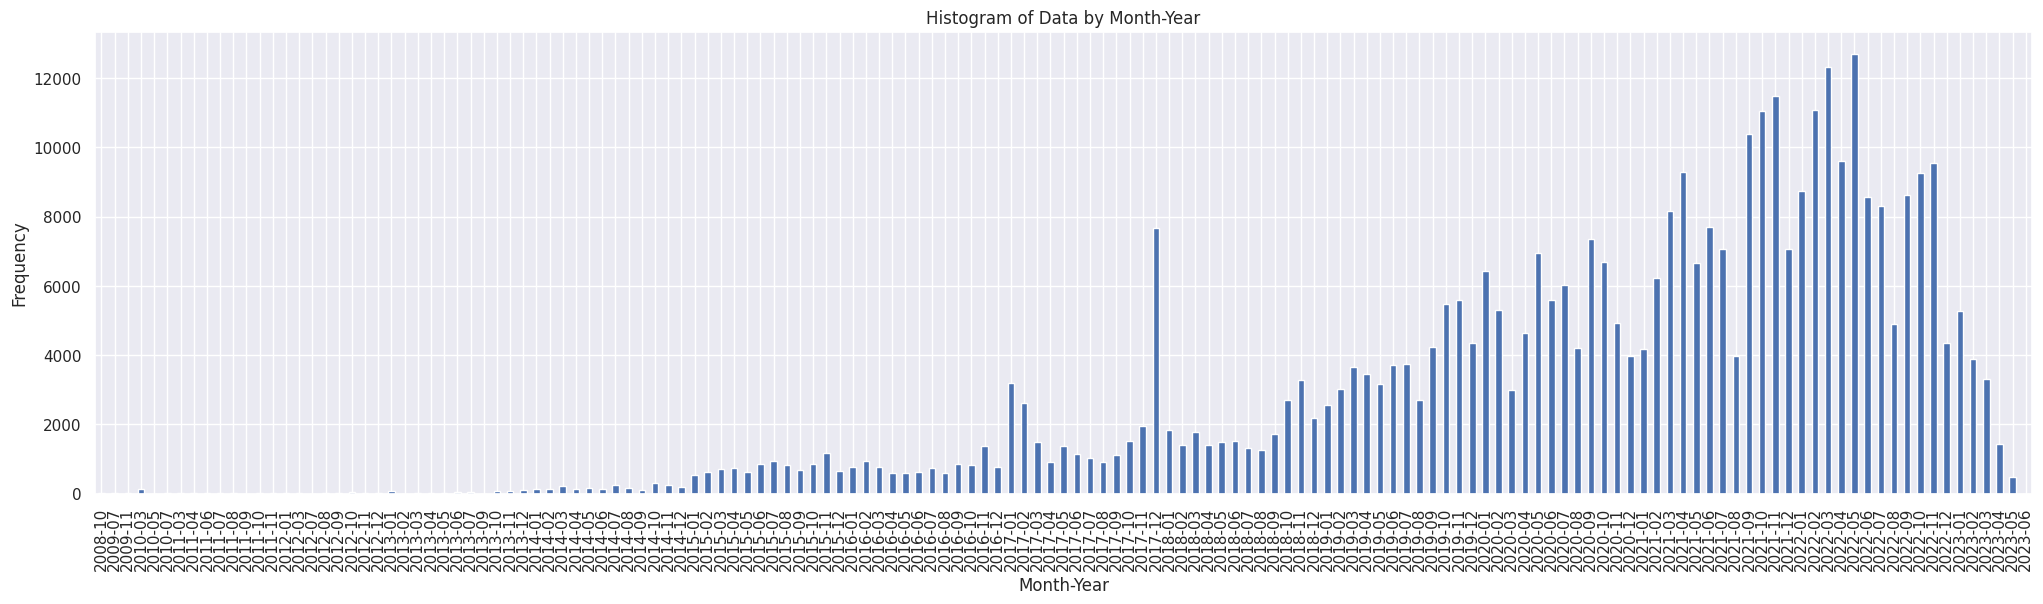

In [32]:
df_bruno['latest_live_date_month_year'] = df_bruno['latest_live_date'].dt.to_period('M')
df_filtrado = df_bruno[df_bruno['is_heavy_saas'] == "true"]
plt.figure(figsize=(25, 6))
df_filtrado['latest_live_date_month_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month-Year')
plt.ylabel('Frequency')
plt.title('Histogram of Data by Month-Year')
plt.show()

In [33]:
df.groupby('churn')['is_heavy_saas'].value_counts(normalize=True) * 100

churn  is_heavy_saas
0      false            79.494053
       true             20.505947
1      false            99.929279
       true              0.070721
Name: is_heavy_saas, dtype: float64

<Axes: xlabel='is_heavy_saas', ylabel='Count'>

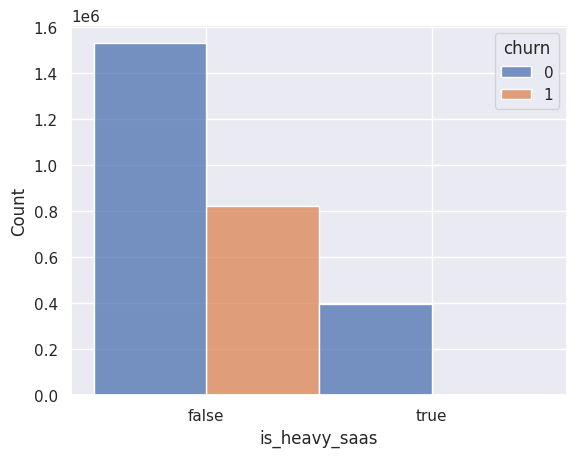

In [34]:
sns.histplot(data=df_bruno, x="is_heavy_saas", hue="churn", multiple="dodge")

Nuevas Variables:
* prepay
* plan_name

In [35]:
df_bruno.prepay.value_counts(normalize=True) * 100

0    93.778377
1     6.221623
Name: prepay, dtype: float64

Cantidad de valores únicos presentes en plan_name

In [37]:
df.plan_name.nunique()

33